In [10]:
import sys
import csv
from pathlib import Path
sys.path.insert(1, '../scripts')

from direct_measurements import DirectMeasurements

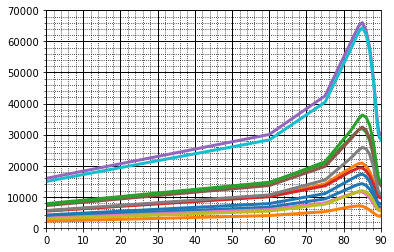

In [21]:
for txt_path in Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"):
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        #plt.figure(figsize=(10, 8))
        plt.minorticks_on()
        plt.grid(which='major', color = 'k', linewidth = 1)
        plt.grid(which='minor', color = 'k', linestyle = ':')
        plt.xlim(0, 90)
        plt.ylim(0, 70000)
        #plt.xlabel("height[m]")
        #plt.ylabel("NO_2 [ppbv]")
        #plt.title(txt_path.name.replace(".csv", "").replace("_", " "))
        dir_meas = DirectMeasurements(txt_path.name)
        tup_dir_meas = dir_meas.direct_measurements_for_profile()
        plt.plot(tuple(float(x[0]) for x in tup_dir_meas), 
                 tuple(float(x[1]) for x in tup_dir_meas),
                 linewidth=3)
plt.show()